# UNAD_Sogamoso
## Nury Lizeth Montañez Hernandez
## GRUPO _ 202016908_30
## Predicción sobre quien sobrevivio al naufragio del Titanic con Regresión Logística

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
from sklearn.preprocessing import LabelEncoder

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('Titanic-Dataset.csv')

In [4]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


* __PassengerId:__ Identificador único de cada pasajero.
* __Survived:__ Indica si el pasajero sobrevivió (1) o no (0).
* __Pclass:__ Clase del boleto del pasajero (1 = 1ra clase, 2 = 2da clase, 3 = 3ra clase).
* __Name:__ Nombre del pasajero.
* __Sex:__ Género del pasajero.
* __Age:__ Edad del pasajero.
* __SibSp:__ Número de hermanos/esposos a bordo del Titanic.
* __Parch:__ Número de padres/hijos a bordo del Titanic.
* __Ticket:__ Número del boleto del pasajero.
* __Fare:__ Tarifa pagada por el boleto.
* __Cabin:__ Número de cabina del pasajero (si disponible).
* __Embarked:__ Puerto de embarque del pasajero (C = Cherburgo, Q = Queenstown, S = Southampton).

In [5]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


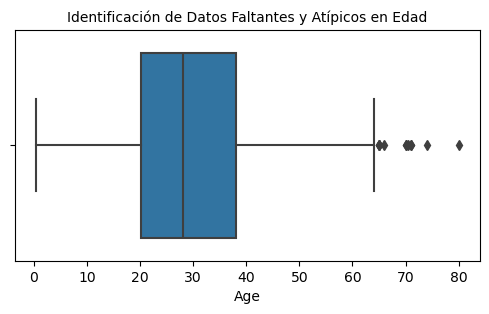

In [6]:
#Identificación de Datos Faltantes y Atípicos

# Crear un boxplot para la variable Age
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos en Edad', fontsize=10)
plt.show()

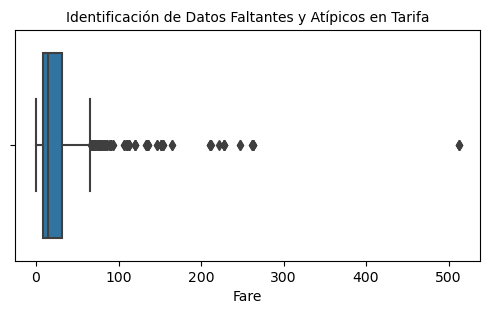

In [7]:
# Crear un boxplot para la variable Fare
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos en Tarifa', fontsize=10)
plt.show()

In [8]:
print(Datos.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [9]:
# Identificar valores faltantes
valores_faltantes = Datos.isnull().sum()

# Mostrar los valores faltantes por columna
print(valores_faltantes)
        

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Identificación de Datos Atípicos - Edad y Tarifa pagada por boleto')

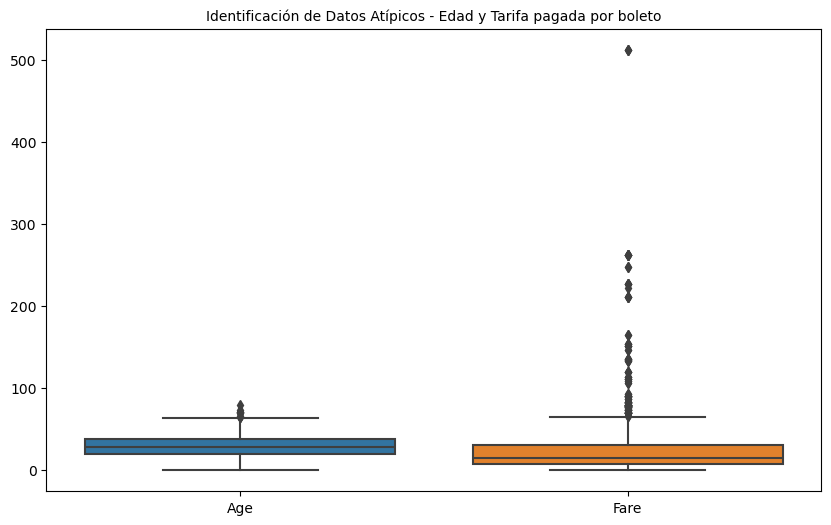

In [10]:
#Identificación de Datos Atípicos comparacion entre la variables

plt.figure(figsize=(10, 6))
sns.boxplot(data=Datos[['Age', 'Fare']])
plt.title('Identificación de Datos Atípicos - Edad y Tarifa pagada por boleto', fontsize=10)

In [11]:
# Calcular el rango intercuartílico para la variable Age
Q1_Age = Datos['Age'].quantile(0.25)
Q3_Age = Datos['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age

# Definir los límites para los valores no atípicos utilizando la regla de 1.5*IQR
nivel_minimo_Age = Q1_Age - 1.5 * IQR_Age
nivel_maximo_Age = Q3_Age + 1.5 * IQR_Age

# Contar los datos atípicos
Total_Atipicos_Age = ((Datos['Age'] < nivel_minimo_Age) | (Datos['Age'] > nivel_maximo_Age)).sum()
print("El total de datos atípicos en la Edad es {}".format(Total_Atipicos_Age))


El total de datos atípicos en la Edad es 11


In [12]:
# Calcular el rango intercuartílico para la variable Fare
Q1_Fare = Datos['Fare'].quantile(0.25)
Q3_Fare = Datos['Fare'].quantile(0.75)
IQR_Fare = Q3_Fare - Q1_Fare

# Definir los límites para los valores no atípicos segun los datos presentados
nivel_minimo_Fare = Q1_Fare - 2.5 * IQR_Fare
nivel_maximo_Fare = Q3_Fare + 2.5 * IQR_Fare

# Contar los datos atípicos
Total_Atipicos_Fare = ((Datos['Fare'] < nivel_minimo_Fare) | (Datos['Fare'] > nivel_maximo_Fare)).sum()
print("El total de datos atípicos en la Tarifa es {}".format(Total_Atipicos_Fare))


El total de datos atípicos en la Tarifa es 63


In [13]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Age']<=nivel_maximo_Age)&(Datos['Age']>=nivel_minimo_Age)]
Datos=Datos[(Datos['Fare']<=nivel_maximo_Fare)&(Datos['Fare']>=nivel_minimo_Fare)]

In [14]:
# Validar si se removieron los datos atípicos

Total_Atipicos_Age = ((Datos['Age'] < nivel_minimo_Age) | (Datos['Age'] > nivel_maximo_Age)).sum()
print("El total de datos atípicos en la Edad es {}".format(Total_Atipicos_Age))

Total_Atipicos_Fare = ((Datos['Fare'] < nivel_minimo_Fare) | (Datos['Fare'] > nivel_maximo_Fare)).sum()
print("El total de datos atípicos en la Tarifa es {}".format(Total_Atipicos_Fare))

El total de datos atípicos en la Edad es 0
El total de datos atípicos en la Tarifa es 0


In [15]:
# Revisión del tipo de datos y datos faltantes
# Para el caso de la columna cabin no se realizo ninguna modificación ya que esta variable no sera tenida en cuenta para el analisis

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 646 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  646 non-null    int64  
 1   Survived     646 non-null    int64  
 2   Pclass       646 non-null    int64  
 3   Name         646 non-null    object 
 4   Sex          646 non-null    object 
 5   Age          646 non-null    float64
 6   SibSp        646 non-null    int64  
 7   Parch        646 non-null    int64  
 8   Ticket       646 non-null    object 
 9   Fare         646 non-null    float64
 10  Cabin        130 non-null    object 
 11  Embarked     644 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 65.6+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:
* Survived: si la persona sobrevivio o no (0 = no sobrevivio al naufragio,  1 = si sobrevivio al naufragio)
* la columna Survived será la variable objetivo (dependiente) y las demás columnas se pueden utilizar como variables predictoras (independientes).

In [16]:
# Total de personas que sobrevivieron

Datos['Survived'].value_counts()

Survived
0    401
1    245
Name: count, dtype: int64

In [17]:
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la columna 'Sex' utilizando LabelEncoder
Datos['Sex'] = label_encoder.fit_transform(Datos['Sex'])

# Ahora 'Sex' se convierte en una columna numérica, donde 'Male' es 1 y 'Female' es 0

In [18]:
Datos[['Sex']].head(10)

,Sex
0,1
1,0
2,0
3,0
4,1
6,1
7,1
8,0
9,0
10,0


In [19]:
#'Embarked' es una variable categórica que representa el puerto de embarque y tiene tres categorías: 'C', 'Q' y 'S'. 
# No hay un orden intrínseco en estas categorías, por lo que el Label Encoding asignará valores numéricos a cada una de ellas 
# ('C' pasa a ser 0, 'Q' 1 y 'S' 2), lo cual es lo mas apropiado para este caso.

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la columna 'Embarked' utilizando LabelEncoder
Datos['Embarked'] = label_encoder.fit_transform(Datos['Embarked'])

In [20]:
Datos[['Embarked']].head(20)

,Embarked
0,2
1,0
2,2
3,2
4,2
6,2
7,2
8,2
9,0
10,2


In [21]:
# Seleccionar solo las columnas relevantes para el análisis
Datos = Datos[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [22]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Survived 
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Survived

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [23]:
print (X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
540       1    0  36.0      0      2  71.0000         2
721       3    1  17.0      1      0   7.0542         2
529       2    1  23.0      2      1  11.5000         2
818       3    1  43.0      0      0   6.4500         2
106       3    0  21.0      0      0   7.6500         2
..      ...  ...   ...    ...    ...      ...       ...
543       2    1  32.0      1      0  26.0000         2
857       1    1  51.0      0      0  26.5500         2
12        3    1  20.0      0      0   8.0500         2
769       3    1  32.0      0      0   8.3625         2
693       3    1  25.0      0      0   7.2250         0

[484 rows x 7 columns]


In [24]:
print (Y_train)

540    1
721    0
529    0
818    0
106    1
      ..
543    1
857    1
12     0
769    0
693    0
Name: Survived, Length: 484, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [26]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [27]:
print (Y_test)

313    0
462    0
312    0
322    1
755    1
      ..
220    1
238    0
443    1
147    0
860    0
Name: Survived, Length: 162, dtype: int64


In [28]:
print (Prediccion)

[0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [29]:
prediccion = modelo_regresion.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, prediccion))
print("Classification Report:\n", classification_report(Y_test, prediccion))
print("Confusion Matrix:\n", confusion_matrix(Y_test, prediccion))

Accuracy: 0.7901234567901234
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       101
           1       0.78      0.62      0.69        61

    accuracy                           0.79       162
   macro avg       0.79      0.76      0.77       162
weighted avg       0.79      0.79      0.78       162

Confusion Matrix:
 [[90 11]
 [23 38]]


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

Text(0.5, 1.0, 'Matriz de Confusión del Modelo')

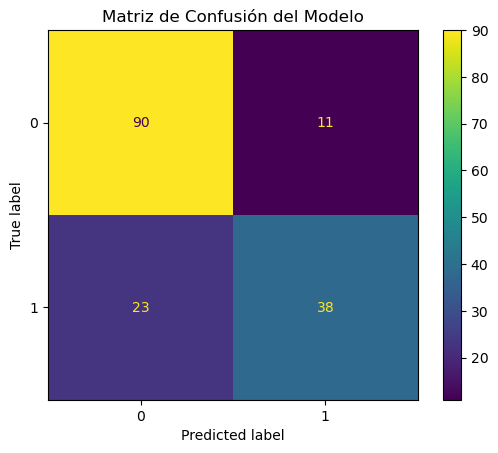

In [30]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.title('Matriz de Confusión del Modelo')


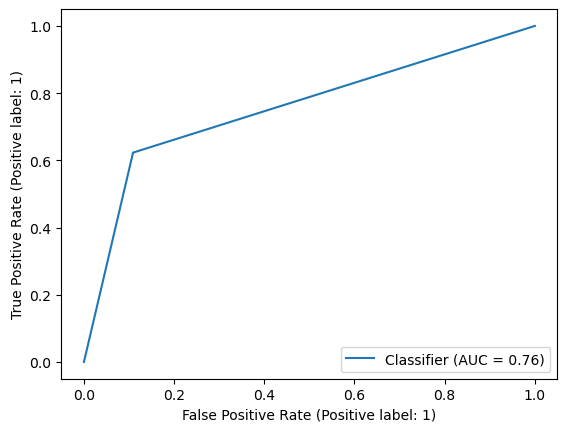

In [31]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

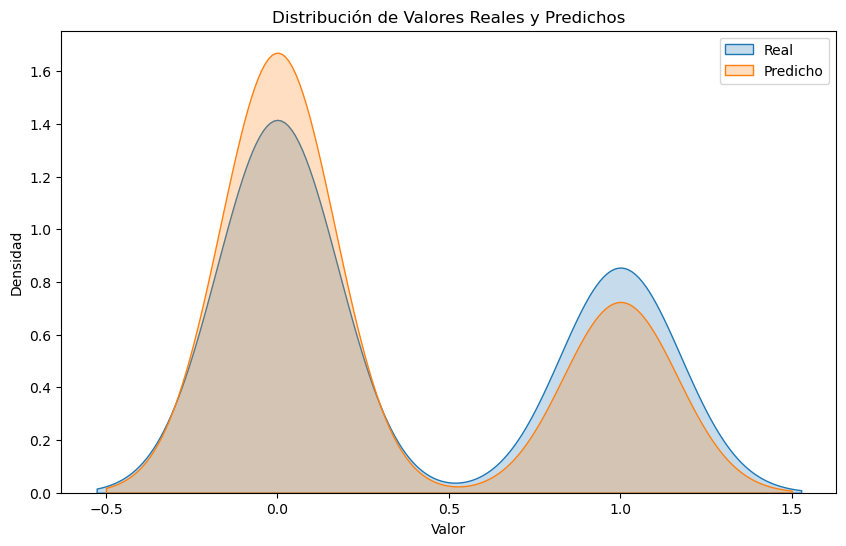

In [32]:
# Crear un DataFrame con los valores reales y predichos
df = pd.DataFrame({'Real': Y_test, 'Predicho': Prediccion})

# Graficar la distribución de los valores reales y predichos
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Real', label='Real', fill=True)
sns.kdeplot(data=df, x='Predicho', label='Predicho', fill=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Distribución de Valores Reales y Predichos')
plt.legend()
plt.grid(False)
plt.show()

## 7. Interpretar, analizar y documentar los resultados obtenidos

__Precisión:__ es una medida de qué tan precisas son las predicciones positivas del modelo. En este contexto, la precisión del 80% para la clase 0 (no sobrevivientes) indica que el 80% de las veces que el modelo predijo que una persona no sobrevivió, realmente no sobrevivió. Para la clase 1 (sobrevivientes), la precisión del 78% significa que el 78% de las veces que el modelo predijo que una persona sobrevivió, efectivamente sobrevivió.

__Recall (Sensibilidad):__ también conocido como sensibilidad, es una medida de qué tan bien el modelo detecta o recupera las muestras positivas. Para la clase 0 (no sobrevivientes), un recall del 89% indica que el 89% de las personas que realmente no sobrevivieron fueron correctamente identificadas por el modelo como no sobrevivientes. Para la clase 1 (sobrevivientes), un recall del 62% significa que el modelo identificó correctamente como sobrevivientes al 62% de las personas que realmente sobrevivieron.

__F1-score:__ es una medida de la precisión de un modelo que considera tanto la precisión como el recall. Es la media armónica de precision y recall. Para la clase 0 (no sobrevivientes), el F1-score del 84% indica un buen equilibrio entre precisión y recall. Similarmente, el F1-score del 69% para la clase 1 (sobrevivientes) también muestra un equilibrio entre precisión y recall.

__Exactitud (Accuracy):__ es una medida de qué tan bien el modelo clasifica correctamente todas las muestras. Con una exactitud del 79%, podemos decir que el 79% de todas las predicciones del modelo son correctas. 

* __Verdaderos negativos__: El modelo predijo correctamente que 90 personas no sobrevivieron. 

* __Falsos positivos__: El modelo predijo incorrectamente que 11 personas sobrevivieron cuando en realidad no lo hicieron.

* __Falsos negativos__: El modelo predijo incorrectamente que 23 personas no sobrevivieron cuando en realidad sí lo hicieron.

* __Verdaderos positivos__: El modelo predijo correctamente que 38 personas sobrevivieron.

* Un Classifier con un AUC (Área bajo la Curva ROC) de 0.76 indica que el modelo tiene una capacidad razonable para discriminar entre las clases positivas y negativas. donde un valor de 1 indicaría un rendimiento perfecto y 0.5 indicaría un rendimiento aleatorio. En este caso, el 76% de las veces, el modelo clasifica correctamente una instancia aleatoria positiva más alta que una instancia aleatoria negativa. Esto sugiere que el modelo tiene una capacidad moderada para distinguir entre aquellos que sobrevivieron y aquellos que no en el conjunto de datos del Titanic.